# Project: Comparison of Linear Models

## Introduction
In this mini-project, we will explore and compare the performance of various linear models: Lasso, Ridge, and Linear Regression. We will use the Celsius to Fahrenheit conversion formula as our simple example.

The conversion formula is:

F = (9/5) * C + 32

## Objectives
- Understand the differences between the mentioned linear models.
- Apply these models to a dataset and evaluate their performance.
- Visualize the results clearly and comprehensibly.

## Table of Contents
1. [Importing Libraries](#importing-libraries)
2. [Generating Data](#generating-data)
3. [Visualizing Data](#visualizing-data)
4. [Linear Models](#linear-models)
    - [Results Plots](#results-plot)
5. [Model Evaluation](#model-evaluation)
6. [Conclusions](#conclusions)


## Importing Libraries

In [25]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Generating data

In [26]:
#Generating the base data 
np.random.seed(42)
celsius = np.random.randint(-273, 1000, size=200)
fahrenheit = (9/5) * celsius + 32

#Create DataFrame
data = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})
data.head()

,Celsius,Fahrenheit
0,853,1567.4
1,587,1088.6
2,857,1574.6
3,822,1511.6
4,771,1419.8


In [27]:
#Prepare data
X = data[['Celsius']]
y = data['Fahrenheit']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Visualizing Data

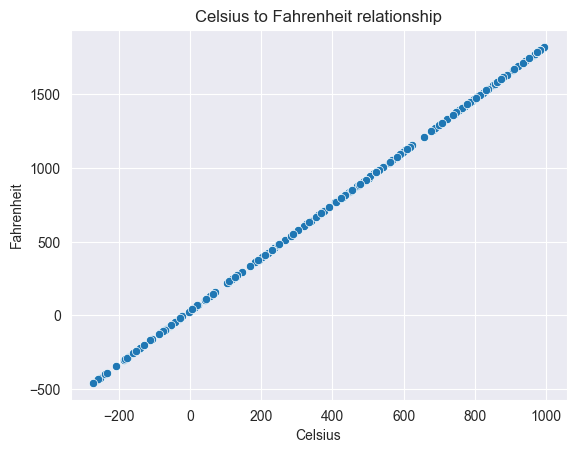

In [28]:
#Visualizing the linear relationship
sns.scatterplot(x='Celsius', y='Fahrenheit', data=data)
plt.title("Celsius to Fahrenheit relationship")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.show()

## Linear Models

In [29]:
#Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
}

results = {}
coefficients = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    }
    coefficients[name] = {
        'Intercept': model.intercept_,
        'Coefficient': model.coef_[0]
    }

results_df = pd.DataFrame(results).T
coefficients_df = pd.DataFrame(coefficients).T

### Results plot

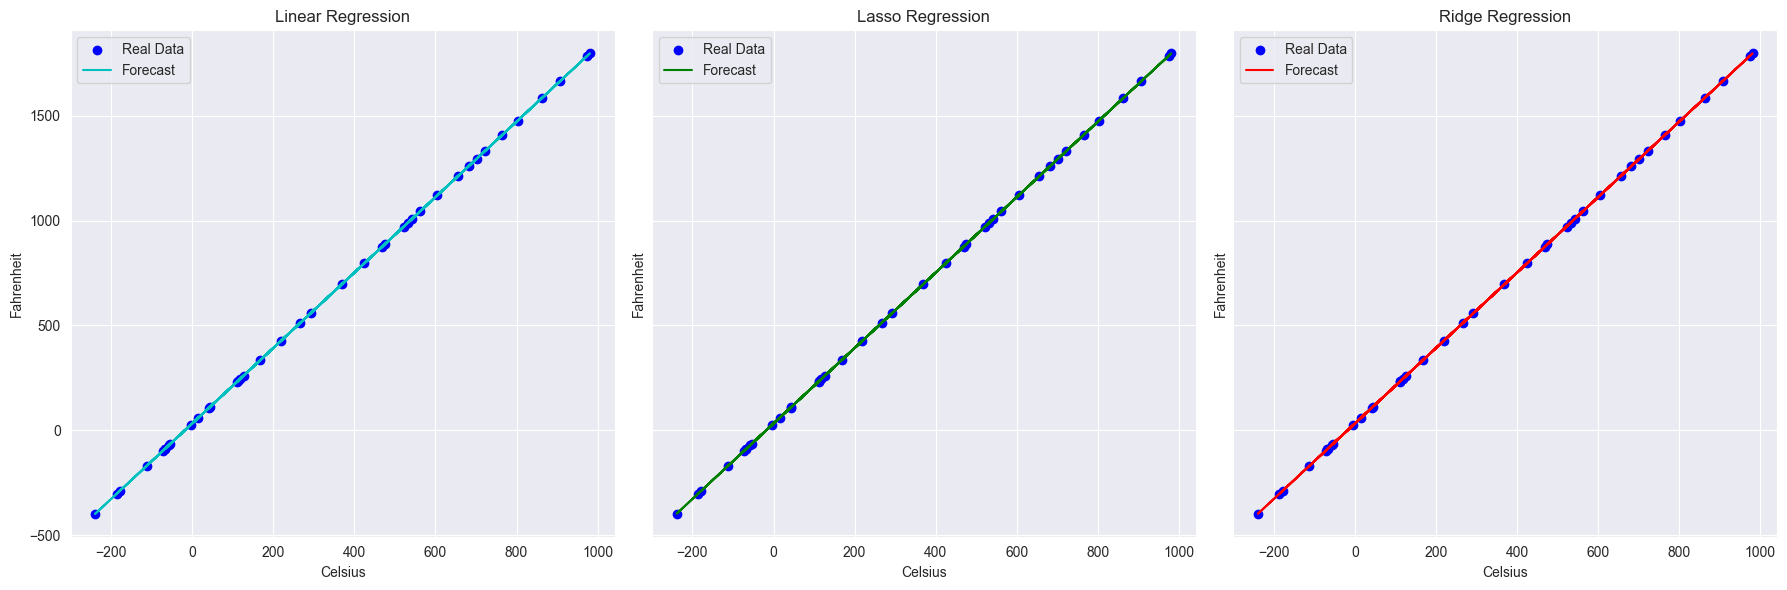

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
colors = ['c', 'g', 'r']
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    axes[i].scatter(X_test, y_test, color='blue', label='Real Data')
    axes[i].plot(X_test, y_pred, color=colors[i], label='Forecast')
    
    axes[i].set_title(name)
    axes[i].set_xlabel('Celsius')
    axes[i].set_ylabel('Fahrenheit')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## Model Evaluation

In [31]:
#Evaluate the models
results_df

,R2 Score,MSE
Linear Regression,1.0,3.740715e-26
Lasso Regression,1.0,7.704334e-08
Ridge Regression,1.0,9.750796e-10


In [32]:
#Coefficients of the real formula
coefficients_df

,Intercept,Coefficient
Linear Regression,32.000000,1.800000
Lasso Regression,32.000317,1.799999
Ridge Regression,32.000036,1.800000


## Conclusions
### Comparison of Linear Models
- All models (Linear Regression, Lasso Regression, and Ridge Regression) exhibit excellent performance in predicting Celsius to Fahrenheit conversion, with an R2 Score close to 1.0 in all cases.
- The intercept for each model is close to 32, aligning with the constant in the conversion formula.
- The slope coefficients are consistent around 1.8, indicating all models accurately fit the linear relationship between Celsius and Fahrenheit.

### Performance Evaluation
- All models have an extremely low Mean Squared Error (MSE), suggesting exceptional accuracy in predictions.
- The lowest MSE is observed in the Ridge Regression model, followed by Linear Regression and then Lasso Regression. This slight difference suggests Ridge Regression may be slightly optimized for these specific data, though the variance is minimal.

### Recommendations
- Given the nearly identical performance of the models in this specific case, the choice of model may depend on additional considerations such as model interpretability (Linear Regression), regularization (Lasso or Ridge), or specific problem characteristics.